In [34]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../data/results.csv')

In [3]:
df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False
43751,2022-06-14,South Korea,Egypt,4,1,Friendly,Seoul,South Korea,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [5]:
df.date.min()

'1872-11-30'

In [6]:
df.date.max()

'2022-06-14'

In [7]:
df.home_team.unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [8]:
len(df.home_team.unique())

306

In [9]:
df.query('away_team=="Morocco"')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4851,1960-11-13,Tunisia,Morocco,2,1,FIFA World Cup qualification,Tunis,Tunisia,False
4905,1961-04-02,Ghana,Morocco,0,0,FIFA World Cup qualification,Accra,Ghana,False
4962,1961-06-18,Yugoslavia,Morocco,3,2,Friendly,Belgrade,Yugoslavia,False
4964,1961-06-21,German DR,Morocco,1,2,Friendly,Erfurt,German DR,False
5053,1961-11-23,Spain,Morocco,3,2,FIFA World Cup qualification,Madrid,Spain,False
...,...,...,...,...,...,...,...,...,...
43132,2021-12-04,Jordan,Morocco,0,4,Arab Cup,Al Rayyan,Qatar,True
43198,2022-01-18,Gabon,Morocco,2,2,African Cup of Nations,Yaoundé,Cameroon,True
43244,2022-01-30,Egypt,Morocco,2,1,African Cup of Nations,Yaoundé,Cameroon,True
43327,2022-03-25,DR Congo,Morocco,1,1,FIFA World Cup qualification,Kinshasa,DR Congo,False


In [14]:
df.groupby(['home_team']).agg({'date':'count'}).sort_values(by='date', ascending=False)

,date
home_team,
Brazil,589
Argentina,564
Mexico,543
Germany,524
England,520
...,...
Central Spain,1
Romani people,1
Sark,1


In [11]:
df.groupby(['away_team']).agg({'date':'count'}).reset_index().sort_values(by='date', ascending=False).head(20)

,away_team,date
281,Uruguay,556
252,Sweden,545
81,England,522
119,Hungary,489
201,Paraguay,471
100,Germany,456
12,Argentina,447
205,Poland,445
299,Zambia,435
91,Finland,430


In [12]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='away_score', ylabel='Count'>

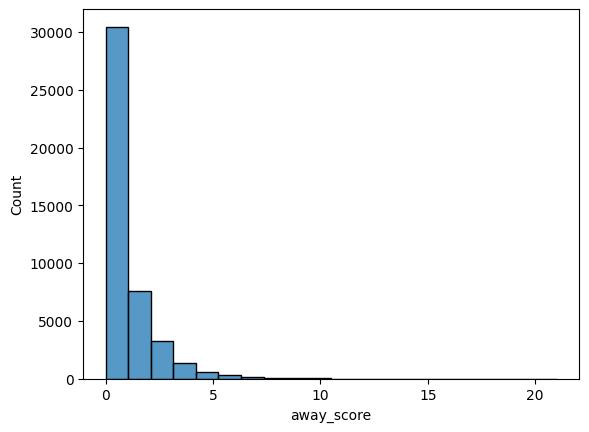

In [21]:
sns.histplot(x='away_score',data=df,bins=20)

<AxesSubplot: xlabel='home_score', ylabel='Count'>

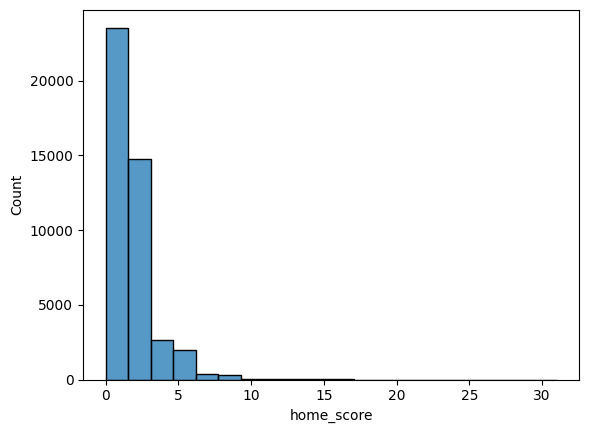

In [22]:
sns.histplot(x='home_score',data=df,bins=20)

<AxesSubplot: xlabel='home_score', ylabel='count'>

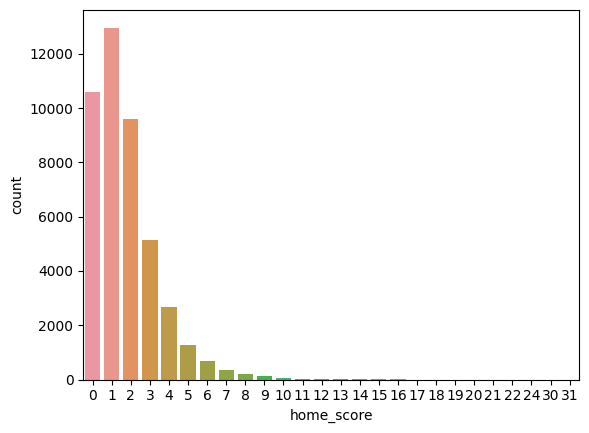

In [23]:
sns.countplot(x='home_score',data=df)

In [26]:
from scipy.stats import poisson

In [27]:
poisson.pmf(4,2)

0.09022352215774178

In [29]:
df.tournament.unique()
ts=['FIFA World Cup', 'FIFA World Cup qualification']

In [30]:
def winner(home_score,away_score):
    if home_score > away_score:
        return 'home_win'
    elif home_score < away_score:
            return 'home_lose'
    else :
        return 'draw'

df['winner']=df.apply(lambda x: winner(x.home_score,x.away_score),axis=1)


In [31]:
df.groupby(['winner']).agg({"date":"count"})

,date
winner,
draw,10084
home_lose,12376
home_win,21292


In [40]:
" base line 21292/43752  "

' base line 21292/43752  '

In [32]:
preditors=['home_team','away_team']

x=pd.get_dummies(df[preditors])
y=df['winner']

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,max_depth=7)

model.fit(x,y)

RandomForestClassifier(max_depth=7)

In [38]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y,model.predict(x)))

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        draw       0.00      0.00      0.00     10084
   home_lose       0.94      0.02      0.03     12376
    home_win       0.49      1.00      0.66     21292

    accuracy                           0.49     43752
   macro avg       0.48      0.34      0.23     43752
weighted avg       0.51      0.49      0.33     43752



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
np.unique(model.predict(x),return_counts=True)

(array(['home_lose', 'home_win'], dtype=object),
 array([  200, 43552], dtype=int64))